<a href="https://colab.research.google.com/github/pkboom/introduction_to_ml_with_python/blob/master/Titanic_LeeYoohan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
%load_ext lab_black

# Basic setting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
print(plt.style.available)
sns.set(font_scale=2.5)
import missingno as msno

# ignore warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# 1. Check Dataset

In [34]:
df_train = pd.read_csv("data/Titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df_test = pd.read_csv("data/Titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 Null Data Check

In [38]:
for col in df_train.columns:
    print(
        "colum: {:<11} % of NaN: {:.2f}%".format(
            col, 100 * df_train[col].isnull().sum() / df_train[col].shape[0]
        )
    )

colum: PassengerId % of NaN: 0.00%
colum: Survived    % of NaN: 0.00%
colum: Pclass      % of NaN: 0.00%
colum: Name        % of NaN: 0.00%
colum: Sex         % of NaN: 0.00%
colum: Age         % of NaN: 19.87%
colum: SibSp       % of NaN: 0.00%
colum: Parch       % of NaN: 0.00%
colum: Ticket      % of NaN: 0.00%
colum: Fare        % of NaN: 0.00%
colum: Cabin       % of NaN: 77.10%
colum: Embarked    % of NaN: 0.22%


In [39]:
for col in df_test.columns:
    print(
        "colum: {:<11} % of NaN: {:.2f}%".format(
            col, 100 * df_test[col].isnull().sum() / df_test[col].shape[0]
        )
    )

colum: PassengerId % of NaN: 0.00%
colum: Pclass      % of NaN: 0.00%
colum: Name        % of NaN: 0.00%
colum: Sex         % of NaN: 0.00%
colum: Age         % of NaN: 20.57%
colum: SibSp       % of NaN: 0.00%
colum: Parch       % of NaN: 0.00%
colum: Ticket      % of NaN: 0.00%
colum: Fare        % of NaN: 0.24%
colum: Cabin       % of NaN: 78.23%
colum: Embarked    % of NaN: 0.00%


In [40]:
# msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

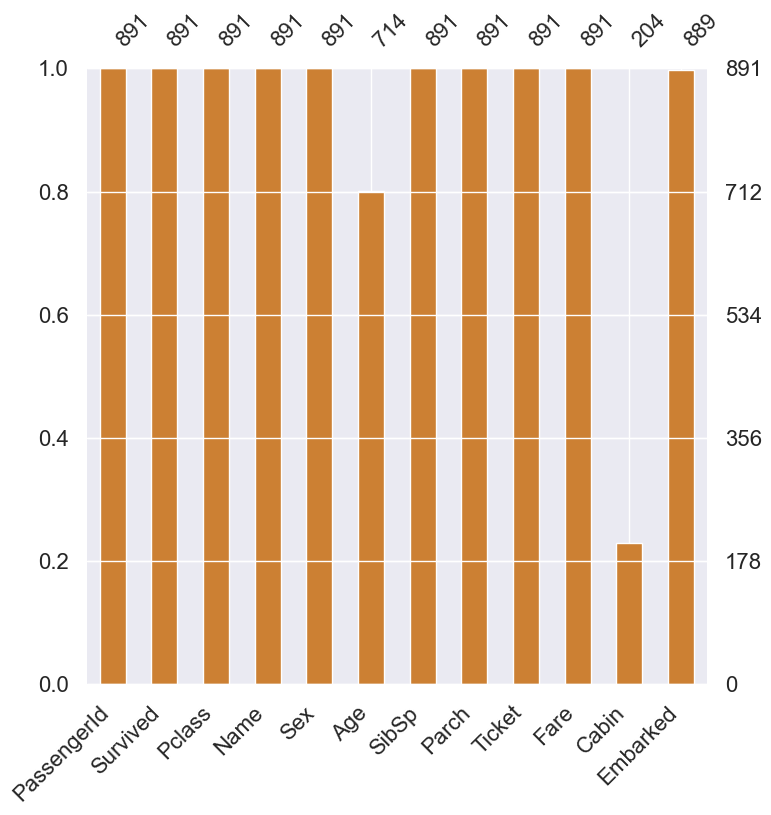

In [41]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

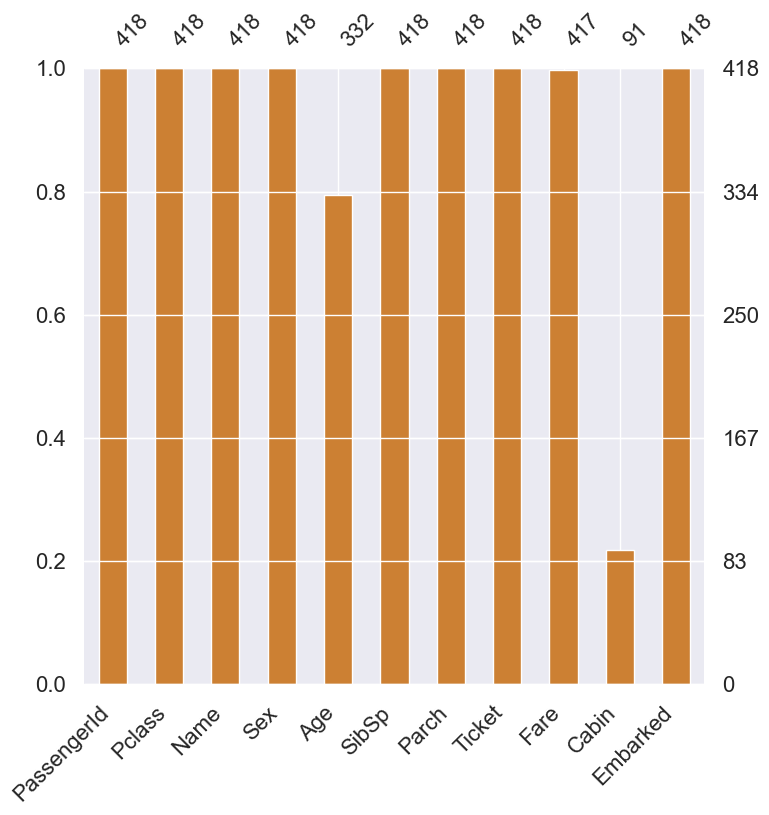

In [42]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## 1.2 Check Target Label

target label 이 어떤 distribution 을 가지고 있는지 확인해봐야 합니다.

지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

In [43]:
f, axes = plt.subplots(1, 2, figsize=(18, 8))

df_train["Survived"].value_counts().plot.pie(explod=[0, 0.1], autopct)

SyntaxError: positional argument follows keyword argument (1798532199.py, line 3)